In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
true_scores = pd.read_csv('data/semeval_eng/truth/graded.txt', sep='\t', header=None)
true_scores.columns = ['word_pos', 'score']
true_scores['word'] = [s.split('_')[0] for s in true_scores['word_pos']]
true_scores = true_scores.sort_values('score')
true_scores['rank'] = range(len(true_scores))
true_scores.head()

,word_pos,score,word,rank
4,chairman_nn,0.000000,chairman,0
28,risk_nn,0.000000,risk,1
10,fiction_nn,0.020723,fiction,2
27,relationship_nn,0.056218,relationship,3
34,tree_nn,0.070839,tree,4


In [22]:
pred_scores = pd.read_csv('data/semeval_eng/predicted_shifts.tsv', sep='\t', header=None)
pred_scores.columns = ['word', 'score']
pred_scores = pred_scores.sort_values('score')
pred_scores['rank'] = range(len(pred_scores))
pred_scores.head()

,word,score,rank
2,fiction,7.801256,0
8,multitude,8.101946,1
30,stab,8.114007,2
20,pin,8.361450,3
15,donkey,8.532033,4


<AxesSubplot:xlabel='rank_true', ylabel='rank_pred'>

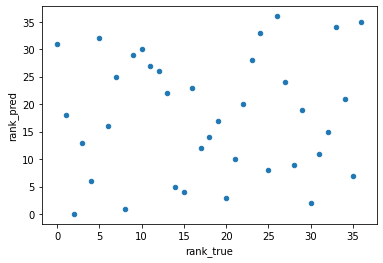

In [24]:
scores_merged = pred_scores.merge(true_scores, on='word', suffixes=('_pred', '_true'))
scores_merged.plot(kind='scatter', x='rank_true', y='rank_pred')

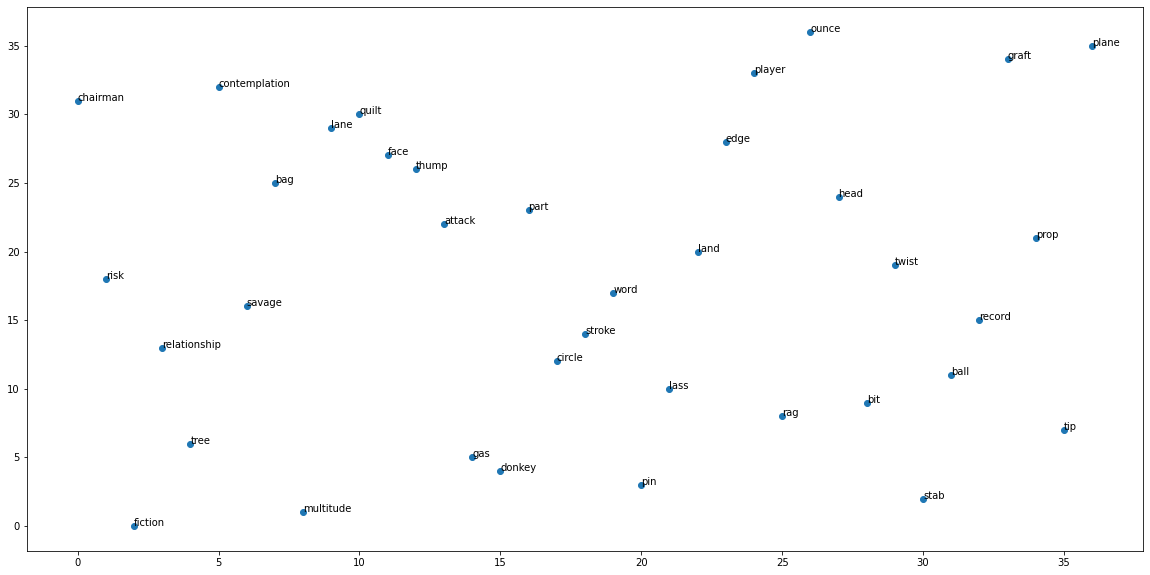

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(x=scores_merged['rank_true'], 
         y=scores_merged['rank_pred'])
for i in range(len(scores_merged)):
    plt.text(x=scores_merged['rank_true'][i],
         y=scores_merged['rank_pred'][i],
         s=scores_merged['word'][i])